In [1]:
import os

from dotenv import load_dotenv
load_dotenv()

True

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### Model

In [ ]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o", temperature=0)

In [3]:
from langchain_core.messages import HumanMessage

msg = HumanMessage(content="Hello world", name="Oliver")
messages = [msg]
llm.invoke(messages)

AIMessage(content='Hello Oliver! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 12, 'total_tokens': 22, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CFOaxFR9n7sQCSV9elgk3kaqBlWiQ', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--50e617e0-3d2a-434c-bd94-901cef7717e3-0', usage_metadata={'input_tokens': 12, 'output_tokens': 10, 'total_tokens': 22, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

### Tavily Search

In [4]:
from langchain_tavily import TavilySearch

tavily_search = TavilySearch(max_results=3)
type(tavily_search)

langchain_tavily.tavily_search.TavilySearch

In [5]:
# result = tavily_search.invoke("Find me a hotel in Bangkok")
# result

### Serpapi Search

In [5]:
from langchain_community.utilities import SerpAPIWrapper

serp_search = SerpAPIWrapper()

serp_search.run("Obama's first name?")

'Barack Hussein Obama II'

In [ ]:
from functools import lru_cache
from typing import List, Optional, Dict, Any
from serpapi import GoogleSearch

In [25]:
@lru_cache(maxsize=None)
def search_flights(
    origin: str,
    destination: str,
    departure_date: str,
    return_date: Optional[str]) -> dict:
    """
    Search flights between two airports using SerpAPI Google Flights and return available options.
    """
    params = {
        "api_key": os.environ["SERPAPI_API_KEY"],
        "engine": "google_flights",
        "hl": "en",
        "gl": "th",
        "departure_id": origin.strip().upper(),
        "arrival_id": destination.strip().upper(),
        "outbound_date": departure_date,
        "return_date": return_date,
        "currency": "THB"
    }
    
    results = GoogleSearch(params).get_dict()
    return results

In [26]:
result = search_flights(
    origin="BKK", 
    destination="CNX", 
    departure_date="2025-09-20", 
    return_date="2025-09-25")

result

{'search_metadata': {'id': '68cb169ee6cb305ba17d3203',
  'status': 'Success',
  'json_endpoint': 'https://serpapi.com/searches/6167b05886a09f32/68cb169ee6cb305ba17d3203.json',
  'created_at': '2025-09-17 20:14:22 UTC',
  'processed_at': '2025-09-17 20:14:22 UTC',
  'google_flights_url': 'https://www.google.com/travel/flights?hl=en&gl=th&curr=THB&tfs=CBwQAhoeEgoyMDI1LTA5LTIwagcIARIDQktLcgcIARIDQ05YGh4SCjIwMjUtMDktMjVqBwgBEgNDTlhyBwgBEgNCS0tCAQFIAXABmAEB&tfu=EgIIAQ',
  'raw_html_file': 'https://serpapi.com/searches/6167b05886a09f32/68cb169ee6cb305ba17d3203.html',
  'prettify_html_file': 'https://serpapi.com/searches/6167b05886a09f32/68cb169ee6cb305ba17d3203.prettify',
  'total_time_taken': 1.01},
 'search_parameters': {'engine': 'google_flights',
  'hl': 'en',
  'gl': 'th',
  'departure_id': 'BKK',
  'arrival_id': 'CNX',
  'outbound_date': '2025-09-20',
  'return_date': '2025-09-25',
  'currency': 'THB'},
 'best_flights': [{'flights': [{'departure_airport': {'name': 'Suvarnabhumi Airport

In [27]:
result.keys()

dict_keys(['search_metadata', 'search_parameters', 'best_flights', 'other_flights', 'price_insights', 'airports'])

In [28]:
print(type(result.get("best_flights")))
result.get("best_flights")

<class 'list'>


[{'flights': [{'departure_airport': {'name': 'Suvarnabhumi Airport',
     'id': 'BKK',
     'time': '2025-09-20 21:25'},
    'arrival_airport': {'name': 'Chiang Mai International Airport',
     'id': 'CNX',
     'time': '2025-09-20 22:50'},
    'duration': 85,
    'airplane': 'Airbus A321',
    'airline': 'Thai Vietjet Air',
    'airline_logo': 'https://www.gstatic.com/flights/airline_logos/70px/VZ.png',
    'travel_class': 'Economy',
    'flight_number': 'VZ 104',
    'legroom': '28 in',
    'extensions': ['Below average legroom (28 in)',
     'Carbon emissions estimate: 75 kg']}],
  'total_duration': 85,
  'carbon_emissions': {'this_flight': 75000,
   'typical_for_this_route': 65000,
   'difference_percent': 15},
  'price': 2106,
  'type': 'Round trip',
  'airline_logo': 'https://www.gstatic.com/flights/airline_logos/70px/VZ.png',
  'departure_token': 'WyJDalJJYVU5U1pFZEhjVkV6V0dkQlFXRTJVa0ZDUnkwdExTMHRMUzB0TFc5NVlXSXhNa0ZCUVVGQlIycE1SbkE0U1RSTk0ydEJFZ1ZXV2pFd05Cb0tDTG9RRUFBYUExUklRa

In [54]:
@lru_cache(maxsize=None)
def search_hotels(
    destination: str, 
    check_in_date: str, 
    check_out_date: str) -> dict:
    """
    Search hotels in a location using SerpAPI Google Hotels and return available options.
    """
    
    params = {
        "api_key": os.environ["SERPAPI_API_KEY"],
        "engine": "google_hotels",
        "hl": "en",
        "gl": "th",
        "q": destination,
        "check_in_date": check_in_date,
        "check_out_date": check_out_date,
        "currency": "THB",
        "sort_by": 3,
        "rating": 8
    }
    
    results = GoogleSearch(params).get_dict()
    return results

In [ ]:
result = search_hotels(
    destination="CNX", 
    check_in_date="2025-09-20", 
    check_out_date="2025-09-25"
)

result

{'search_metadata': {'id': '68cb2684af5fdce37679cf3a',
  'status': 'Success',
  'json_endpoint': 'https://serpapi.com/searches/221be9512e2e5874/68cb2684af5fdce37679cf3a.json',
  'created_at': '2025-09-17T21:22:12.707Z',
  'processed_at': '2025-09-17T21:22:12.709Z',
  'google_hotels_url': 'https://www.google.com/_/TravelFrontendUi/data/batchexecute?rpcids=AtySUc&source-path=/travel/search&hl=en&gl=th&rt=c&soc-app=162&soc-platform=1&soc-device=1',
  'raw_html_file': 'https://serpapi.com/searches/221be9512e2e5874/68cb2684af5fdce37679cf3a.html',
  'prettify_html_file': 'https://serpapi.com/searches/221be9512e2e5874/68cb2684af5fdce37679cf3a.prettify',
  'total_time_taken': {'float': 1.4515666961669922}},
 'search_parameters': {'engine': 'google_hotels',
  'q': 'CNX',
  'gl': 'th',
  'hl': 'en',
  'currency': 'THB',
  'check_in_date': '2025-09-20',
  'check_out_date': '2025-09-25',
  'adults': 2,
  'children': 0,
  'sort_by': '3',
  'rating': '8'},
 'search_information': {'total_results': 10

In [42]:
result.keys()

dict_keys(['search_metadata', 'search_parameters', 'search_information', 'brands', 'properties', 'serpapi_pagination'])

In [44]:
print(type(result.get("properties")[:3]))
result.get("properties")[0]

<class 'list'>


{'type': 'hotel',
 'name': 'Collection O Bupamontra Chiangmai',
 'link': 'https://www.oyorooms.com/249759/',
 'property_token': 'ChoIhseO46Obgpb2ARoNL2cvMTFiNjM5cG44YxAB',
 'serpapi_property_details_link': 'https://serpapi.com/search.json?adults=2&check_in_date=2025-09-20&check_out_date=2025-09-25&children=0&currency=THB&engine=google_hotels&gl=th&hl=en&property_token=ChoIhseO46Obgpb2ARoNL2cvMTFiNjM5cG44YxAB&q=CNX&rating=8&sort_by=3',
 'gps_coordinates': {'latitude': 18.7724132, 'longitude': 98.9825413},
 'check_in_time': '2:00\u202fPM',
 'rate_per_night': {'lowest': 'THB\xa0236',
  'extracted_lowest': 236,
  'before_taxes_fees': 'THB\xa0219',
  'extracted_before_taxes_fees': 219},
 'total_rate': {'lowest': 'THB\xa01,182',
  'extracted_lowest': 1182,
  'before_taxes_fees': 'THB\xa01,095',
  'extracted_before_taxes_fees': 1095},
 'deal': '35% less than usual',
 'deal_description': 'Great Deal',
 'nearby_places': [{'name': 'Wat Phra Singh Woramahawihan',
   'transportations': [{'type': '

### Tools

In [49]:
from langchain_core.tools import tool

@tool
def search_flights_tool(
    origin: str,
    destination: str,
    departure_date: str,
    return_date: Optional[str]) -> dict:
    """
    Search for flights using Google Flights API
    
    Args:
        origin: Origin airport code or city
        destination: Destination airport code or city
        departure_date: Departure date (YYYY-MM-DD)
        return_date: Return date (YYYY-MM-DD)
    
    Returns:
        Dict containing flight search results
    """
    try:
        results = search_flights(
            origin=origin,
            destination=destination,
            departure_date=departure_date,
            return_date=return_date
        )
        
        flights = []
        if "best_flights" in results:
            for flight in results["best_flights"][:5]:  # Top 5 flights
                flights.append({
                    "airline": flight.get("flights", [{}])[0].get("airline", "Unknown"),
                    "price": flight.get("price", "N/A"),
                    "duration": flight.get("total_duration", "N/A"),
                    "departure_time": flight.get("flights", [{}])[0].get("departure_airport", {}).get("time", "N/A"),
                    "arrival_time": flight.get("flights", [{}])[-1].get("arrival_airport", {}).get("time", "N/A"),
                    "stops": len(flight.get("flights", [])) - 1,
                    "travel_class": flight.get("flights", [{}])[0].get("travel_class", "N/A"),
                    # "return_date":
                    # "airline_logo":
                })
        
        return {
            "flights": flights,
            "search_metadata": {
                "origin": origin,
                "destination": destination, 
                "departure_date": departure_date,
                "return_date": return_date
            }
        }
        
    except Exception as e:
        return {"error": f"Flight search failed: {str(e)}", "flights": []}

    
    
search_flights_tool.invoke({
    "origin": "BKK", 
    "destination": "CNX", 
    "departure_date": "2025-09-20", 
    "return_date": "2025-09-25"
    })

{'flights': [{'airline': 'Thai Vietjet Air',
   'price': 2106,
   'duration': 85,
   'departure_time': '2025-09-20 21:25',
   'arrival_time': '2025-09-20 22:50',
   'stops': 0,
   'travel_class': 'Economy'},
  {'airline': 'Thai AirAsia',
   'price': 2351,
   'duration': 80,
   'departure_time': '2025-09-20 16:35',
   'arrival_time': '2025-09-20 17:55',
   'stops': 0,
   'travel_class': 'Economy'},
  {'airline': 'Thai AirAsia',
   'price': 2351,
   'duration': 80,
   'departure_time': '2025-09-20 20:30',
   'arrival_time': '2025-09-20 21:50',
   'stops': 0,
   'travel_class': 'Economy'},
  {'airline': 'Thai AirAsia',
   'price': 2651,
   'duration': 80,
   'departure_time': '2025-09-20 08:30',
   'arrival_time': '2025-09-20 09:50',
   'stops': 0,
   'travel_class': 'Economy'}],
 'search_metadata': {'origin': 'BKK',
  'destination': 'CNX',
  'departure_date': '2025-09-20',
  'return_date': '2025-09-25'}}

In [56]:
@tool
def search_hotels_tool(
    destination: str,
    check_in_date: str,
    check_out_date: str) -> dict:
    """
    Search for hotels using Google Hotels API
    
    Args:
        location: Hotel destination
        check_in_date: Check-in date (YYYY-MM-DD)
        check_out_date: Check-out date (YYYY-MM-DD)
        budget: Optional budget per night
        
    Returns:
        Dict containing hotel search results
    """
    try:
        results = search_hotels(
            destination=destination,
            check_in_date=check_in_date,
            check_out_date=check_out_date
        )
        
        hotels = []
        if "properties" in results:
            for hotel in results["properties"][:5]:  # Top 5 hotels
                hotels.append({
                    "name": hotel.get("name", "Unknown"),
                    "price": hotel.get("rate_per_night", {}).get("lowest", "N/A"),
                    "rating": hotel.get("overall_rating", "N/A"),
                    "location": hotel.get("nearby_places", "N/A"),
                    "amenities": hotel.get("amenities", []),
                    "link": hotel.get("link", "N/A")
                })
        
        return {
            "hotels": hotels,
            "search_metadata": {
                "destination": destination,
                "check_in_date": check_in_date,
                "check_out_date": check_out_date,
                # "budget": budget
            }
        }
        
    except Exception as e:
        return {"error": f"Hotel search failed: {str(e)}", "hotels": []}

    
search_hotels_tool.invoke({
    "destination": "Chiangmai", 
    "check_in_date": "2025-09-20", 
    "check_out_date": "2025-09-25"
})
    

{'hotels': [{'name': 'Lucky House',
   'price': 'THB\xa0325',
   'rating': 4.1,
   'location': [{'name': 'Wat Chiang Man',
     'transportations': [{'type': 'Walking', 'duration': '3 min'}]},
    {'name': 'BAAC Chiang Mai',
     'transportations': [{'type': 'Walking', 'duration': '4 min'}]},
    {'name': 'Chiang Mai International Airport',
     'transportations': [{'type': 'Taxi', 'duration': '13 min'},
      {'type': 'Public transport', 'duration': '1 hr 5 min'}]},
    {'name': 'The Chef',
     'transportations': [{'type': 'Walking', 'duration': '4 min'}]}],
   'amenities': ['Free Wi-Fi', 'Restaurant', 'Kid-friendly'],
   'link': 'N/A'},
  {'name': 'Hug Glur House & Hostel',
   'price': 'THB\xa0158',
   'rating': 4.2,
   'location': [{'name': 'Watchediluang Varaviharn',
     'transportations': [{'type': 'Taxi', 'duration': '7 min'}]},
    {'name': 'Wat Puak Chang',
     'transportations': [{'type': 'Walking', 'duration': '8 min'}]},
    {'name': 'Chiang Mai International Airport',
   

In [32]:
from pydantic import BaseModel
from typing import List, Optional, Dict, Any

class ItineraryState(BaseModel):
    # --- User Inputs ---
    origin: str
    destination: str
    departure_date: str      # format: YYYY-MM-DD
    return_date: str         # format: YYYY-MM-DD
    interests: Optional[List[str]] = None  # e.g., ["culture", "food", "nature"]

    # --- Flight Info ---
    flight_data: Optional[List[Dict[str, Any]]] = None   # List of flight option dicts
    flights: Optional[str] = None                        # LLM-analyzed recommendation text

    # --- Hotel Info ---
    hotel_data: Optional[List[Dict[str, Any]]] = None    # List of hotel option dicts
    hotels: Optional[str] = None                         # LLM-analyzed recommendation text

    # --- Final Itinerary ---
    itinerary: Optional[str] = None

In [33]:
from langgraph.graph import START, StateGraph, END
from langgraph.prebuilt import create_react_agent
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display

In [55]:
def analyze_flights(state: ItineraryState):
    prompt = f"""
Role: Flight Analyst Assistant
Goal: Analyze flight options and recommend the best one considering price, duration, stops, and overall convenience.
Backstory: You are an expert that provides in-depth analysis comparing flight options across multiple factors.

Raw flight data (JSON):
{state.flight_data}

Instructions:
- Review all provided flight options in the JSON.
- Select a single **best flight** overall.
- Do NOT repeat or paste the raw JSON in your answer.
- Be concise, structured, and focused on decision-making factors.

Output **exactly** in the following Markdown structure:

### ✈️ Flight Recommendation
**Recommendation:** <Airline Name> — <price> THB — <duration> — <stops>

**Reasoning:**
- **Price / value:** Why this flight offers the best value
- **Duration:** Why this flight has an efficient travel time
- **Stops:** Why this flight has minimal or convenient stops
- **Comfort / class:** Why this flight provides the best comfort and class

**Comparison:** Briefly compare to the second-best option (1–2 sentences)
**Confidence (0.0–1.0):** <score>

Keep each bullet concise (1–3 sentences) and use evidence-based reasoning.
"""
    response = llm.invoke(prompt)
    return {'flights': response.content.strip()}


In [56]:
def analyze_hotels(state: ItineraryState):
    prompt = f"""
Role: Hotel Analyst Assistant
Goal: Analyze hotel options and recommend the best one considering price, rating, location, and amenities.
Backstory: You are an expert that provides in-depth analysis comparing hotel options across multiple factors.

Raw hotel data (JSON):
{state.hotel_data}

Instructions:
- Review all provided hotel options in the JSON.
- Select a single **best hotel** overall.
- Do NOT repeat or paste the raw JSON in your answer.
- Be concise, structured, and focused on decision-making factors.

Output **exactly** in the following Markdown structure:

### 🏨 Hotel Recommendation
**Recommendation:** <Hotel Name> — <rating> ⭐ — <price>/night

**Reasoning:**
- **Price / value:** Why this hotel offers the best value
- **Rating / quality:** Why its rating supports a better experience
- **Location:** Why the location is convenient for travelers
- **Amenities / facilities:** Which amenities stand out and why they matter

**Comparison:** Briefly compare to the second-best option (1–2 sentences)
**Confidence (0.0–1.0):** <score>

Keep each bullet concise (1–3 sentences) and use evidence-based reasoning.
"""

    response = llm.invoke(prompt)
    return {'hotels': response.content.strip()}


In [57]:
from datetime import datetime

def plan_itinerary(state: ItineraryState):
    
    check_in = datetime.strptime(state.departure_date, "%Y-%m-%d")
    check_out = datetime.strptime(state.return_date, "%Y-%m-%d")

    # Calculate the difference in days
    days = (check_out - check_in).days
        
    prompt = f"""
Role: Travel Planner Assistant
Goal: Create a detailed travel itinerary for the user based on their flight and hotel information.  
Backstory: You are an experienced travel expert who designs highly personalized and organized day-by-day travel itineraries. You combine flight and hotel details with top attractions, local dining, and transportation advice to ensure a smooth and enjoyable trip.

---

**Flight Details**:  
{state.flights}

**Hotel Details**:  
{state.hotels}

**Destination**: {state.destination}  
**Travel Dates**: {state.departure_date} to {state.return_date}  
**Duration**: {days} days

---

### Your Task

Generate a **complete {days}-day travel itinerary** including:

- ✈️ **Flights**
  - Arrival and departure times
  - Layovers and total duration

- 🏨 **Hotel**
  - Check-in and check-out times
  - Key amenities

- 📅 **Day-by-Day Plan**
  - Morning 🌅: landmarks 🏛️ / cultural sites
  - Afternoon ☀️: museums, markets, tours
  - Evening 🌇: dinner 🍽️, nightlife 🍸, shows 🎭
  - Include estimated times (e.g. 09:00–11:00)

- 🚍 **Transportation Tips**
  - Local travel methods (metro, taxis, walking, bikes)

- 💡 **Travel Tips**
  - Local customs, safety advice, useful apps

---

### Format Requirements

- Use **Markdown formatting**
  - `#` for itinerary title
  - `##` for each day
  - `###` for subsections
- Use **emojis** to make it visually engaging
- Use **bullet points** for lists
- Keep it clean, organized, and easy to read

**Expected Output**:  
A well-structured, visually appealing **Markdown itinerary** with flights, hotel, daily activities, food, transport, and travel tips.
"""
    response = llm.invoke(prompt) 
    return {"itinerary": response.content}

In [64]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(ItineraryState)


def search_flights_node(state: ItineraryState):
    flight_data = search_flights(
        origin=state.origin,
        destination=state.destination,
        departure_date=state.departure_date,
        return_date=state.return_date
    )
    
    return {"flight_data": flight_data.get("best_flights")}

def search_hotels_node(state: ItineraryState):
 
    hotel_data = search_hotels(
        location=state.destination,
        check_in_date=state.departure_date,
        check_out_date=state.return_date
    )
    state.hotel_data = hotel_data
    return {"hotel_data": hotel_data.get("properties")[:3]}

builder.add_node("search_flights", search_flights_node)
builder.add_node("analyze_flights", analyze_flights)

builder.add_node("search_hotels", search_hotels_node)
builder.add_node("analyze_hotels", analyze_hotels)

builder.add_node("planner", plan_itinerary)

builder.add_edge(START, "search_flights")
builder.add_edge(START, "search_hotels")

builder.add_edge("search_flights", "analyze_flights")
builder.add_edge("analyze_flights", "planner")

builder.add_edge("search_hotels", "analyze_hotels")
builder.add_edge("analyze_hotels", "planner")

builder.add_edge("planner", END)

graph = builder.compile()


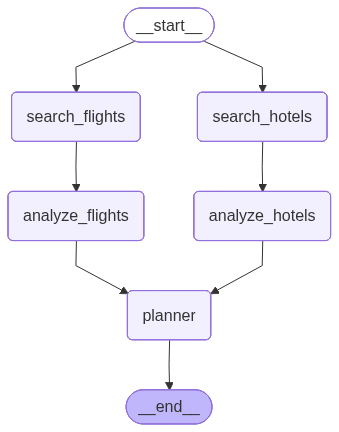

In [59]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [68]:
initial_state = ItineraryState(
    origin="BKK", 
    destination="CNX", 
    departure_date="2025-09-14", 
    return_date="2025-09-15",
    interests=["culture", "food", "nature"]
    )

result = graph.invoke(initial_state)
print("Final Result:", result)

Final Result: {'origin': 'BKK', 'destination': 'CNX', 'departure_date': '2025-09-14', 'return_date': '2025-09-15', 'interests': ['culture', 'food', 'nature'], 'flight_data': [{'flights': [{'departure_airport': {'name': 'Suvarnabhumi Airport', 'id': 'BKK', 'time': '2025-09-14 06:00'}, 'arrival_airport': {'name': 'Chiang Mai International Airport', 'id': 'CNX', 'time': '2025-09-14 07:25'}, 'duration': 85, 'airplane': 'Airbus A320', 'airline': 'Thai Vietjet Air', 'airline_logo': 'https://www.gstatic.com/flights/airline_logos/70px/VZ.png', 'travel_class': 'Economy', 'flight_number': 'VZ 100', 'legroom': '28 in', 'extensions': ['Below average legroom (28 in)', 'Carbon emissions estimate: 68 kg']}], 'total_duration': 85, 'carbon_emissions': {'this_flight': 69000, 'typical_for_this_route': 65000, 'difference_percent': 6}, 'price': 3410, 'type': 'Round trip', 'airline_logo': 'https://www.gstatic.com/flights/airline_logos/70px/VZ.png', 'departure_token': 'WyJDalJJV0ZwcGEwaDJTbWg0WlZGQlNVVXhPRkZ

In [66]:
result.keys()

dict_keys(['origin', 'destination', 'departure_date', 'return_date', 'interests', 'flight_data', 'flights', 'hotel_data', 'hotels', 'itinerary'])

In [67]:
from IPython.display import Markdown, display


display(Markdown(result.get('flights')))
display(Markdown(result.get('hotels')))
display(Markdown(result.get('itinerary')))


### ✈️ Flight Recommendation
**Recommendation:** Thai Vietjet Air — 3410 THB — 1h 25m — Non-stop

**Reasoning:**
- **Price / value:** This flight offers the lowest price among all options, providing great value for the trip.
- **Duration:** With a short duration of 1 hour and 25 minutes, this flight is efficient and time-saving.
- **Stops:** Being a non-stop flight, it ensures a convenient and hassle-free journey.
- **Comfort / class:** While the legroom is below average, the overall convenience and cost-effectiveness make it a suitable choice.

**Comparison:** Compared to the second-best option, Thai AirAsia, which is slightly more expensive and has the same duration but with a stop, Thai Vietjet Air stands out for its better value and direct route.
**Confidence:** 0.9

### 🏨 Hotel Recommendation
**Recommendation:** 84 gallery hostel — 4.8 ⭐ — THB 324/night

**Reasoning:**
- **Price / value:** With a high rating of 4.8 and a relatively low price of THB 324 per night, this hostel offers great value for money.
- **Rating / quality:** The high overall rating and positive reviews for sleep, service, cleanliness, and property indicate a quality stay experience.
- **Location:** Conveniently located near Chiang Mai International Airport and within walking distance to nearby attractions and restaurants.
- **Amenities / facilities:** Offers free Wi-Fi, air conditioning, full-service laundry, and is kid-friendly, catering to various traveler needs.

**Comparison:** The Best One Chiangmai is a close second with a rating of 4.2 and a slightly higher price of THB 334/night.

**Confidence:** 0.9

# Chiang Mai Travel Itinerary

## Day 1: September 14, 2025

### ✈️ Flights
- **Arrival:** 
  - Thai Vietjet Air Flight #123
  - Departure: Bangkok (BKK) at 08:00
  - Arrival: Chiang Mai (CNX) at 09:25
- **Departure:** 
  - Thai Vietjet Air Flight #456
  - Departure: Chiang Mai (CNX) at 18:00
  - Arrival: Bangkok (BKK) at 19:25
- **Total Duration:** 1h 25m (non-stop)

### 🏨 Hotel
- **Check-in:** 84 gallery hostel
  - Check-in Time: 14:00
  - Check-out Time: 12:00
- **Key Amenities:**
  - Free Wi-Fi
  - Air conditioning
  - Full-service laundry
  - Kid-friendly

### 📅 Day-by-Day Plan
- **Morning 🌅:**
  - Visit Wat Phra That Doi Suthep
  - Explore Chiang Mai Old City
- **Afternoon ☀️:**
  - Visit Chiang Mai Night Bazaar
  - Take a cooking class at Thai Farm Cooking School
- **Evening 🌇:**
  - Dinner at The Riverside Bar & Restaurant
  - Explore Chiang Mai Nightlife at Zoe in Yellow
  - Enjoy a traditional Thai cultural show at the Chiang Mai Cabaret Show

### 🚍 Transportation Tips
- Use tuk-tuks or red trucks for short distances
- Rent a scooter for exploring the city at your own pace
- Walk around the Old City for a more immersive experience

### 💡 Travel Tips
- Respect local customs by dressing modestly when visiting temples
- Stay hydrated and carry a reusable water bottle
- Download Grab or Line Taxi apps for convenient transportation options

Enjoy your day in Chiang Mai! 🌴🌺